# **Heart Disease Prediction**

# **Description**

<p> Heart disease remains a leading cause of death globally, highlighting the need for improved diagnostic tools. Machine learning (ML) offers promising avenues to enhance the accuracy and efficiency of heart disease diagnosis. This project explores the development and evaluation of a machine learning classification model for identifying heart disease in patients.

We'll use the <a href=https://archive.ics.uci.edu/dataset/45/heart+disease>Heart Disease dataset</a> from the UCI Machine Learning Repository. The database contains 76 attributes. We will be using the cleveland dataset that has been processed. This processed dataset contains 14 attributes; 13 features and a target variable, with two columns having missing values. The dataset has 303 entries. Each entry represents a patient's test information. while the target variable, 'num', refers to the presence and abscence of heart disease in the patient, it is denoted by integers with value 0 (absence of heart disease) and values 1, 2, 3, and 4 (presence of heart disease). Below is a description of some of the attributes.

| columns | Orignal Column Name | Description |
| ------- | ------------------- | ----------- |
| 0 | age | Age in years |
| 1 | sex | Sex (1 = Male, 0 = Female) |     
| 2 | cp | Type of chest pain |    
| 3 | trestbps | resting blood pressure (in mm Hg on admission to the hospital) | 
| 4 | chol | serum cholestoral in mg/dl |
| 5 | fbs | (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false) |      
| 6 | restecg | resting electrocardiographic results | 
| 7 | thalach | maximum heart rate achieved | 
| 8 | exang | exercise induced angina (1 = yes; 0 = no) | 
| 9 | oldpeak | ST depression induced by exercise relative to rest |
| 10 | slope |  the slope of the peak exercise ST segment |    
| 11 | ca | number of major vessels (0-3) colored by flourosopy |     
| 12 | thal | 3 = normal; 6 = fixed defect; 7 = reversable defect |   
| 13 | num | diagnosis of heart disease (angiographic disease status) | 

This project aims to contribute to the growing body of knowledge on utilizing ML for heart disease diagnosis. By presenting a well-performing model and its evaluation, this report offers valuable insights for further development and potential clinical applications. The ultimate goal is to leverage the power of ML to distinguish the presence (values 1,2,3,4) from absence (value 0).</p>

# **Import Necessary Packages and Load Data**

In [1]:
# import the necessary packages and libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance

# load data
data = pd.read_csv('Datasets/processed.cleveland.data', header=None)
print(data.head())
print(data.shape)
print(data.info())



     0    1    2      3      4    5    6      7    8    9    10   11   12  13
0  63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   0
1  67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   2
2  67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   1
3  37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   0
4  41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   0
(303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       303 non-null    float64
 1   1       303 non-null    float64
 2   2       303 non-null    float64
 3   3       303 non-null    float64
 4   4       303 non-null    float64
 5   5       303 non-null    float64
 6   6       303 non-null    float64
 7   7       303 non-null    float64
 8   8       303 non-null    float64
 9   9    

# **Data Preparation**

## **Data Wrangling**

### **Rename The Features And Target Variable**

In [2]:
data = data.rename(columns={0: 'age', 1: 'sex', 2: 'cp', 3: 'trestbps', 4: 'chol', 5: 'fbs', 6: 'restecg', 7: 'thalach', 8: 'exang', 9: 'oldpeak', 10: 'slope', 11: 'ca', 12: 'thal', 13: 'num'})

### **Checking For Missing Values**

In [3]:
# Check for missing values
print(data.isna().sum())
print(data.tail())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64
      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   
302  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope   ca thal  num  
298    2.0  0.0  7.0    1  
299    2.0  2.0  7.0    2  
300    2.0  1.0  7.0    3  
301    2.0  1.0  3.0    1  
302    1.0    ?  3.0    0  


### **Handling Missing Data**

In [4]:
# Loop through the columns and check for missng values that are represented as question marks ?
for col in data.columns:
    if data[col].isin(['?']).any():
        print(col, ' has ?')
        print(data[col].value_counts())


ca  has ?
ca
0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: count, dtype: int64
thal  has ?
thal
3.0    166
7.0    117
6.0     18
?        2
Name: count, dtype: int64


In [5]:
# Replace question mark ? with np.NaN and check for missing values
data = data.replace('?', np.NaN)
print(data.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


In [6]:
cln_data = data.dropna()
print(cln_data.isna().sum())
print(cln_data.shape)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64
(297, 14)


### **Features Correlation**

In [7]:
data_corr = cln_data.corr()
print(data_corr)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.092399  0.110471  0.290476  0.202644  0.132062   
sex      -0.092399  1.000000  0.008908 -0.066340 -0.198089  0.038850   
cp        0.110471  0.008908  1.000000 -0.036980  0.072088 -0.057663   
trestbps  0.290476 -0.066340 -0.036980  1.000000  0.131536  0.180860   
chol      0.202644 -0.198089  0.072088  0.131536  1.000000  0.012708   
fbs       0.132062  0.038850 -0.057663  0.180860  0.012708  1.000000   
restecg   0.149917  0.033897  0.063905  0.149242  0.165046  0.068831   
thalach  -0.394563 -0.060496 -0.339308 -0.049108 -0.000075 -0.007842   
exang     0.096489  0.143581  0.377525  0.066691  0.059339 -0.000893   
oldpeak   0.197123  0.106567  0.203244  0.191243  0.038596  0.008311   
slope     0.159405  0.033345  0.151079  0.121172 -0.009215  0.047819   
ca        0.362210  0.091925  0.235644  0.097954  0.115945  0.152086   
thal      0.126586  0.383652  0.268500  0.138183  0.010859  0.06

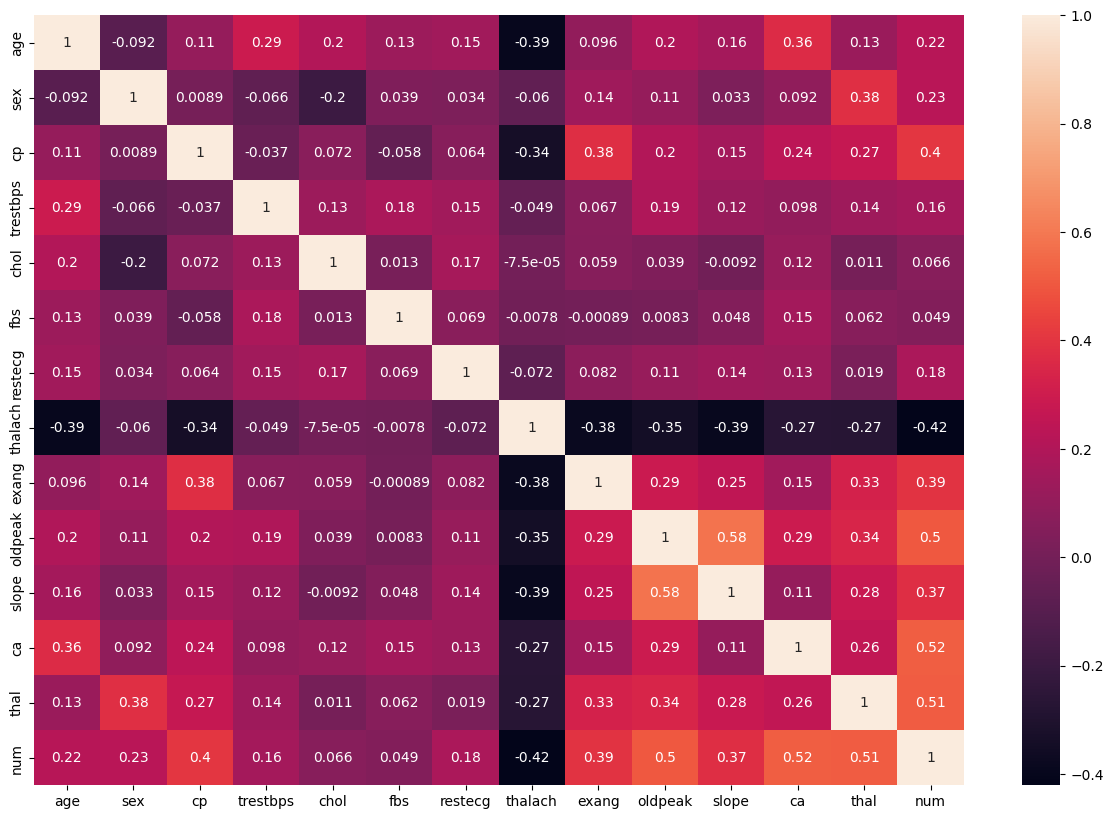

In [8]:
# Visualise the correlation of the data
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(ax=ax, data=data_corr, annot=True)
plt.show()

### **Data Spliting**

In [9]:
# Create features and target variables
X = cln_data.drop(['fbs', 'restecg', 'chol', 'num'], axis=1).values
y = cln_data['num'].values

# Split data into test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=4)


# **Model Building**

## **Logistic Regression**

### **Data Preprocessing**

In [10]:
# Use pipeline to scale the data
steps = [('scaler', MinMaxScaler()), ('logreg', LogisticRegression())]
pipeline = Pipeline(steps)


### **Model Training**

In [11]:
# Train, predict and determine the accuracy of the model
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

### **Model Evaluation**

In [12]:
print('Logistic Regression accuracy is', pipeline.score(X_test, y_test))
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))


Logistic Regression accuracy is 0.5733333333333334
[[37  9  3  1  0]
 [ 3  4  3  6  2]
 [ 0  1  1  1  1]
 [ 0  0  2  1  0]
 [ 0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.93      0.74      0.82        50
           1       0.29      0.22      0.25        18
           2       0.11      0.25      0.15         4
           3       0.11      0.33      0.17         3
           4       0.00      0.00      0.00         0

    accuracy                           0.57        75
   macro avg       0.29      0.31      0.28        75
weighted avg       0.70      0.57      0.62        75



### **Feature Importance**

In [13]:
coefficients = pipeline.named_steps['logreg'].coef_
avg_importance = np.mean(np.abs(coefficients), axis=0)
feat_imp_lr = pd.Series(avg_importance, index = cln_data.drop(['fbs', 'restecg', 'chol', 'num'], axis=1).columns)

In [14]:
# coefficients = pipeline.named_steps['logreg'].coef_[0].round(2)
# feat_imp_lr = pd.Series(coefficients, index = cln_data.drop(['sex', 'fbs', 'restecg', 'oldpeak', 'exang', 'chol', 'num'], axis=1).columns)
feat_imp_lr = feat_imp_lr.sort_values(ascending = False)
feat_imp_lr

ca          0.895187
oldpeak     0.787745
cp          0.706081
thal        0.559501
slope       0.553355
exang       0.533971
thalach     0.489714
sex         0.349924
trestbps    0.340850
age         0.294270
dtype: float64

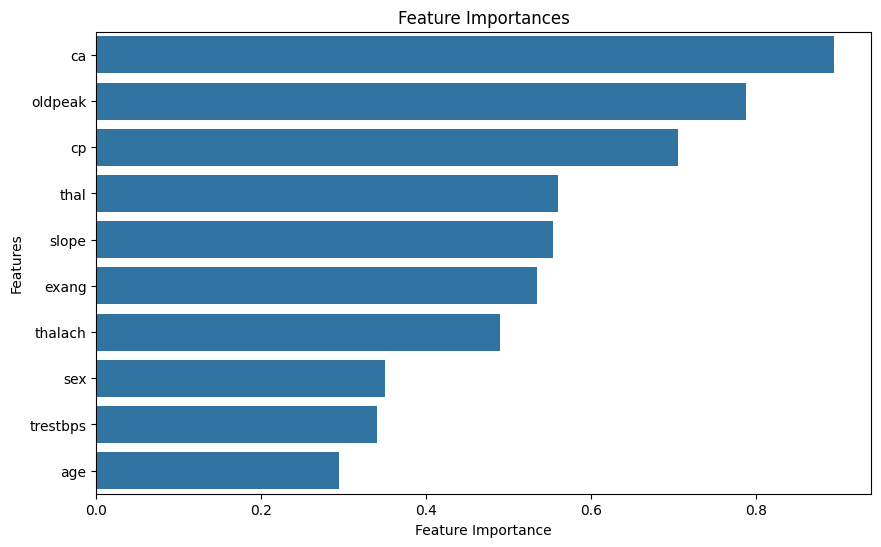

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp_lr, y=feat_imp_lr.index)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances")
plt.show()

### **Performing Cross Validation and Hyperparameter Tuning**

In [16]:
# Create param_grid for gridsearch
tol = np.arange(0.0001, 0.01, 0.0001)
max_iter = [100, 150, 200, 250, 300]
params = {'logreg__tol':tol, 'logreg__max_iter':max_iter}

# Instantiate GridSearch
grid_cv = GridSearchCV(pipeline, param_grid=params, cv=5)

#Fit and train model
grid = grid_cv.fit(X_train, y_train)
grid_model = grid_cv.best_estimator_

# Use grid_model to predict
grid_pred = grid_model.predict(X_test)


### **Evaluate Model**

In [17]:
#Evaluate model performance
best_score, best_params = grid.best_score_, grid.best_params_
print("Model accuracy %f with %s" % (best_score, best_params))
print(confusion_matrix(grid_pred, y_test))
print(classification_report(grid_pred, y_test))

Model accuracy 0.608081 with {'logreg__max_iter': 100, 'logreg__tol': 0.0084}
[[37 10  3  2  0]
 [ 3  3  3  5  2]
 [ 0  1  1  2  0]
 [ 0  0  2  0  1]
 [ 0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.93      0.71      0.80        52
           1       0.21      0.19      0.20        16
           2       0.11      0.25      0.15         4
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         0

    accuracy                           0.55        75
   macro avg       0.25      0.23      0.23        75
weighted avg       0.69      0.55      0.61        75



## **Random Forest Classifier**

### **Model Training**

In [18]:
# Instantialise and fit Random Forest Classifier
rf = RandomForestClassifier(n_estimators=300, max_samples=0.15, n_jobs=-1)
rf.fit(X_train, y_train)

# Use rf to predict
rf_pred = rf.predict(X_test)

### **Model Evaluation**

In [19]:
#Evaluate model
print(rf.score(X_test, y_test))
print(confusion_matrix(rf_pred, y_test))
print(classification_report(rf_pred, y_test))


0.5333333333333333
[[38 13  4  4  1]
 [ 1  0  3  3  1]
 [ 0  1  1  1  1]
 [ 1  0  1  1  0]
 [ 0  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.95      0.63      0.76        60
           1       0.00      0.00      0.00         8
           2       0.11      0.25      0.15         4
           3       0.11      0.33      0.17         3
           4       0.00      0.00      0.00         0

    accuracy                           0.53        75
   macro avg       0.23      0.24      0.22        75
weighted avg       0.77      0.53      0.62        75



### **Feature Importance**

thalach     0.157019
oldpeak     0.155993
age         0.123064
trestbps    0.122035
ca          0.104464
thal        0.101759
cp          0.091087
exang       0.061101
slope       0.050558
sex         0.032921
dtype: float64


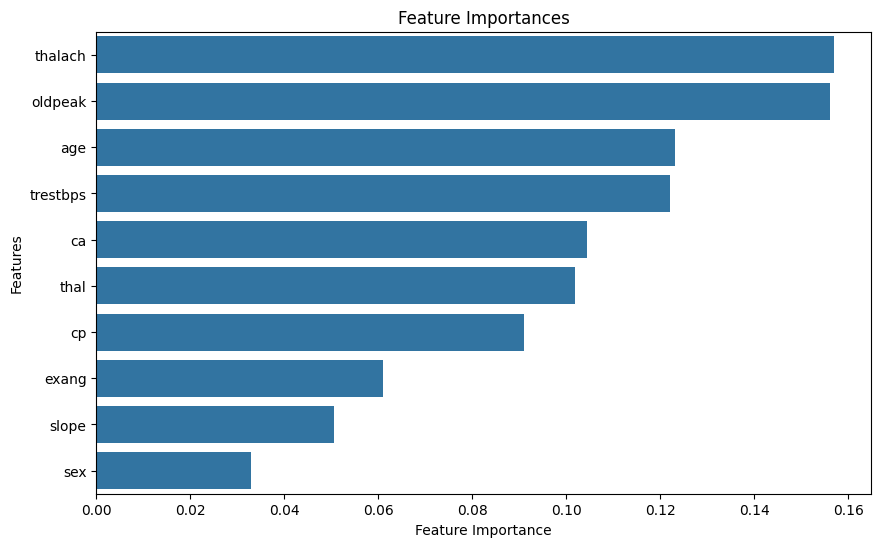

In [20]:
coeff = rf.feature_importances_
coeff_df = pd.Series(coeff, index = cln_data.drop(['fbs','restecg', 'chol', 'num'], axis=1).columns)
coeff_df = coeff_df.sort_values(ascending=False)
print(coeff_df)
plt.figure(figsize=(10, 6))
sns.barplot(x=coeff_df, y=coeff_df.index)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances")
plt.show()